# Interactivity in notebooks: grain settling

We'll be using a function called `interact`, part of the `ipywidgets` package. The package contains [a lot of other widgets](http://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html), which you should check out.

We'll illustrate this function with Zoltan Sylvester's grain settling functions, as explored in [his blog post of 9 August 2013](https://hinderedsettling.com/2013/08/09/grain-settling-python/).

In [1]:
import numpy as np

% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
rop = 2650.0 # density of particle in kg/m3
rof = 1000.0 # density of water in kg/m3
visc = 1.002 * 1e-3 # dynamic viscosity in Pa*s at 20 C
C1 = 18 # constant in Ferguson-Church equation
C2 = 1 # constant in Ferguson-Church equation
g = 9.80655

def v_stokes(rop, rof, D, visc, C1):
        R = (rop - rof) / rof # submerged specific gravity
        w = R * g * D**2 / (C1 * visc/rof)
        return w

def v_turbulent(rop, rof, d, visc, C2):
        R = (rop - rof) / rof
        w = np.sqrt(4*R*g*D / (3*C2))
        return w

def v_ferg(rop, rof, D, visc, C1, C2):
        R = (rop - rof) / rof
        w = R * g * D**2 / (C1 * visc/rof + np.sqrt(0.75*C2*R*9.81*D**3))
        return w

In [3]:
D = np.arange(0, 0.0005, 0.000001)
ws = v_stokes(rop, rof, D, visc, C1)
wt = v_turbulent(rop, rof, D, visc, C2)
wf = v_ferg(rop, rof, D, visc, C1, C2)

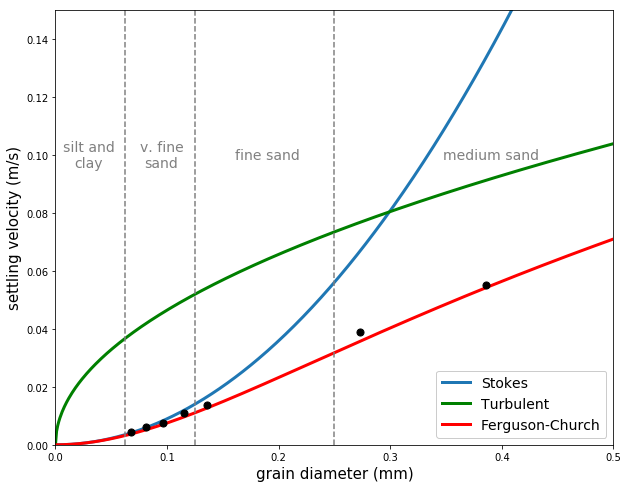

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.plot(D*1000, ws, label='Stokes',linewidth=3)
ax.plot(D*1000, wt, 'g',label='Turbulent',linewidth=3)
ax.plot(D*1000, wf, 'r',label='Ferguson-Church',linewidth=3)
ax.axvline(0.25, c='gray', ls='--')
ax.axvline(0.25/2, c='gray', ls='--')
ax.axvline(0.25/4, c='gray', ls='--')
params = dict(color='gray', ha='center', va='center', fontsize=14)
ax.text(0.39, 0.1, 'medium sand', **params)
ax.text(0.19, 0.1, 'fine sand', **params)
ax.text(0.095, 0.1, 'v. fine\nsand', **params)
ax.text(0.03, 0.1, 'silt and\nclay', **params)
ax.legend(loc=4, fontsize=14, framealpha=1)
ax.set_xlabel('grain diameter (mm)',fontsize=15)
ax.set_ylabel('settling velocity (m/s)',fontsize=15)
ax.set_xlim([0,0.5])
ax.set_ylim([0,0.15])

# Add some experimental data (see blog post for details).
d = [0.068, 0.081, 0.096, 0.115, 0.136, 0.273,
    0.386, 0.55, 0.77, 1.09, 2.18, 4.36]
w = [0.00425, 0.0060, 0.0075, 0.0110, 0.0139, 0.0388,
    0.0551, 0.0729, 0.0930, 0.141, 0.209, 0.307]
ax.scatter(d, w, 50, color='k', zorder=100)

# Finish up.
plt.show()

In [5]:
from ipywidgets import interact

In [6]:
def v_stokes(rop, rof, D, visc, C1):
        R = (rop - rof) / rof # submerged specific gravity
        w = R * g * D**2 / (C1 * visc/rof)
        return w

In [7]:
interact(v_stokes, rop=2650, rof=1000, D=1e-4, visc=1.002, C1=18)

A Jupyter Widget

<function __main__.v_stokes>

In [8]:
import ipywidgets as widgets
from ipywidgets import fixed

In [10]:
# ASIDE
# It's not all that easy to make an exponential slider...
ds = list(reversed([1.1e-5**e for e in np.arange(0.5, 1, 0.02)]))
d_slide = widgets.SelectionSlider(options=ds, value=ds[len(ds)//2], description="D")

In [11]:
interact(v_stokes, rop=(2200, 3000, 100), rof=fixed(1000), D=d_slide, visc=1.002, C1=fixed(18))

A Jupyter Widget

<function __main__.v_stokes>

In [15]:
def decorate(ax):
    ax.axvline(0.25, c='gray', ls='--')
    ax.axvline(0.25/2, c='gray', ls='--')
    ax.axvline(0.25/4, c='gray', ls='--')
    params = dict(color='gray', ha='center', va='center', fontsize=14)
    ax.text(0.39, 0.1, 'medium sand', **params)
    ax.text(0.19, 0.1, 'fine sand', **params)
    ax.text(0.095, 0.1, 'v. fine\nsand', **params)
    ax.text(0.03, 0.1, 'silt and\nclay', **params)
    ax.legend(loc=4, fontsize=14, framealpha=1)
    ax.set_xlabel('grain diameter (mm)',fontsize=15)
    ax.set_ylabel('settling velocity (m/s)',fontsize=15)
    ax.set_xlim([0,0.5])
    ax.set_ylim([0,0.15])
    return ax

In [16]:
def plotall(rop=2650):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)

    ws = v_stokes(rop, rof, D, visc, C1)
    wt = v_turbulent(rop, rof, D, visc, C2)
    wf = v_ferg(rop, rof, D, visc, C1, C2)
    
    ax.plot(D*1000, ws, label='Stokes',linewidth=3)
    ax.plot(D*1000, wt, 'g',label='Turbulent',linewidth=3)
    ax.plot(D*1000, wf, 'r',label='Ferguson-Church',linewidth=3)
    
    ax = decorate(ax)

    ax.scatter(d, w, 50, color='k', zorder=100)

    plt.show()
    return

In [17]:
interact(plotall, rop=(2100, 4500, 100))

A Jupyter Widget

<function __main__.plotall>

----

#### UNDER CONSTRUCTION

## Using the decorator

http://mpld3.github.io/examples/index.html#example-gallery

## Connection with d3.js: `mpld3`

http://mpld3.github.io/examples/index.html#example-gallery

## Other options

- plotly
- bokeh
- rolling your own HTML5/JS front end